In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.0 MB/s eta 0:00:00


In [3]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
#https://www.youtube.com/watch?v=8FCDpFhd1zk

In [4]:
data = {'Date': ['2019-01-01', '2019-01-07', '2019-01-14', '2019-01-21', '2019-01-28', '2019-02-04','2019-02-11', '2019-02-18', '2019-02-25','2019-03-04', '2019-03-11', '2019-03-18', '2019-03-25', '2019-04-01', '2019-04-07', '2019-04-14', '2019-04-21',
                 '2019-04-28', '2019-05-05', '2019-05-12','2019-05-19','2019-05-26','2019-06-02','2019-06-09','2019-06-16','2019-06-23','2019-06-30',
                 '2019-07-07','2019-07-14','2019-07-21','2019-07-28','2019-08-04','2019-08-11','2019-08-18','2019-08-25','2019-09-01','2019-09-08','2019-09-15','2019-09-22','2019-09-29','2019-10-06','2019-10-13','2019-10-20','2019-10-27','2019-11-03',
                 '2019-11-10','2019-11-17','2019-11-24','2019-12-01','2019-12-08','2019-12-15','2019-12-22','2019-12-29', '2020-01-05', '2020-01-12', '2020-01-19', '2019-01-26', '2020-02-02','2020-02-09', '2020-02-16', '2020-02-23',
                 '2020-03-01', '2020-03-08', '2020-03-15','2020-03-22', '2020-03-29', '2020-04-05', '2020-04-12', '2020-04-19', '2020-04-26', '2020-05-03', '2020-05-10', '2020-05-17', '2020-05-24', '2020-05-31', '2020-06-07',
                 '2020-06-14', '2020-06-21', '2020-06-28', '2020-07-05', '2020-07-12', '2020-07-19', '2020-07-26', '2020-08-02', '2020-08-09', '2020-08-16', '2020-08-23', '2020-08-30', '2020-09-06', '2020-09-13', '2020-09-20', '2020-09-27',
                 '2020-10-04', '2020-10-11', '2020-10-18','2020-10-25', '2020-11-01', '2020-11-08', '2020-11-15', '2020-11-22', '2020-11-29', '2020-12-06', '2020-12-13', '2020-12-20', '2020-12-27',
                 '2021-01-03', '2021-01-10', '2021-01-17', '2021-01-24', '2021-01-31', '2021-02-07', '2021-02-14', '2021-02-21', '2021-02-28', '2021-03-07', '2021-03-14', '2021-03-21', '2021-03-28', '2021-04-04', '2021-04-11', '2021-04-18',
                 '2021-04-25', '2021-05-02', '2021-05-09', '2021-05-16', '2021-05-23', '2021-05-30', '2021-06-06', '2021-06-13', '2021-06-20', '2021-06-27', '2021-07-04', '2021-07-11', '2021-07-18', '2021-07-25', '2021-08-01', '2021-08-08',
                 '2021-08-15', '2021-08-22', '2021-08-29', '2021-09-05', '2021-09-12', '2021-09-19', '2021-09-26', '2021-10-03', '2021-10-10', '2021-10-17', '2021-10-24', '2021-10-31', '2021-11-07', '2021-11-14', '2021-11-21', '2021-11-28',
                 '2021-12-05', '2021-12-12', '2021-12-19', '2021-12-26','2022-01-02', '2022-01-09', '2022-01-16', '2022-01-23', '2022-01-30', '2022-02-06', '2022-02-13', '2022-02-20', '2022-02-27', '2022-03-06', '2022-03-13', '2022-03-20',
                 '2022-03-27', '2022-04-03', '2022-04-10', '2022-04-17', '2022-04-24', '2022-05-01', '2022-05-08', '2022-05-15', '2022-05-22', '2022-05-29', '2022-06-05', '2022-06-12', '2022-06-19', '2022-06-26', '2022-07-03', '2022-07-10',
                 '2022-07-17', '2022-07-24', '2022-07-31', '2022-08-07', '2022-08-14', '2022-08-21', '2022-08-28', '2022-09-04', '2022-09-11', '2022-09-18', '2022-09-25', '2022-10-02', '2022-10-09', '2022-10-16', '2022-10-23', '2022-10-30',
                 '2022-11-06', '2022-11-13', '2022-11-20', '2022-11-27', '2022-12-04', '2022-12-11', '2022-12-18', '2022-12-25','2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12', '2020-01-13',
                 '2020-01-14', '2020-01-15', '2020-01-16', '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
                 '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
                 '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
                 '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
                 '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
                 '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18',
                 '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
                 '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20',
                 '2020-05-21', '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29', '2020-05-30', '2020-05-31', '2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04', '2020-06-05',
                 '2020-06-06', '2020-06-07', '2020-06-08', '2020-06-09', '2020-06-10', '2020-06-11', '2020-06-12', '2020-06-13', '2020-06-14', '2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18', '2020-06-19', '2020-06-20', '2020-06-21',
                 '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29', '2020-06-30', '2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04', '2020-07-05', '2020-07-06', '2020-07-07',
                 '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-11', '2020-07-12', '2020-07-13', '2020-07-14', '2020-07-15', '2020-07-16', '2020-07-17', '2020-07-18', '2020-07-19', '2020-07-20', '2020-07-21', '2020-07-22', '2020-07-23',
                 '2020-07-24', '2020-07-25', '2020-07-26', '2020-07-27', '2020-07-28', '2020-07-29', '2020-07-30', '2020-07-31', '2020-08-01', '2020-08-02', '2020-08-03', '2020-08-04', '2020-08-05', '2020-08-06', '2020-08-07', '2020-08-08',
                 '2020-08-09', '2020-08-10', '2020-08-11', '2020-08-12', '2020-08-13', '2020-08-14', '2020-08-15', '2020-08-16', '2020-08-17', '2020-08-18', '2020-08-19', '2020-08-20', '2020-08-21', '2020-08-22', '2020-08-23', '2020-08-24',
                 '2020-08-25', '2020-08-26', '2020-08-27', '2020-08-28', '2020-08-29', '2020-08-30', '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04', '2020-09-05', '2020-09-06', '2020-09-07', '2020-09-08', '2020-09-09',
                 '2020-09-10', '2020-09-11', '2020-09-12', '2020-09-13', '2020-09-14', '2020-09-15', '2020-09-16', '2020-09-17', '2020-09-18', '2020-09-19', '2020-09-20', '2020-09-21', '2020-09-22', '2020-09-23', '2020-09-24', '2020-09-25',
                 '2020-09-26', '2020-09-27', '2020-09-28', '2020-09-29', '2020-09-30', '2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04', '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-08', '2020-10-09', '2020-10-10', '2020-10-11',
                 '2020-10-12', '2020-10-13', '2020-10-14', '2020-10-15', '2020-10-16', '2020-10-17', '2020-10-18', '2020-10-19', '2020-10-20', '2020-10-21', '2020-10-22', '2020-10-23', '2020-10-24', '2020-10-25', '2020-10-26', '2020-10-27',
                 '2020-10-28', '2020-10-29', '2020-10-30', '2020-10-31', '2020-11-01', '2020-11-02', '2020-11-03', '2020-11-04', '2020-11-05', '2020-11-06', '2020-11-07', '2020-11-08', '2020-11-09', '2020-11-10', '2020-11-11', '2020-11-12',
                 '2020-11-13', '2020-11-14', '2020-11-15', '2020-11-16', '2020-11-17', '2020-11-18', '2020-11-19', '2020-11-20', '2020-11-21', '2020-11-22', '2020-11-23', '2020-11-24', '2020-11-25', '2020-11-26', '2020-11-27', '2020-11-28',
                 '2020-11-29', '2020-11-30', '2020-12-01', '2020-12-02', '2020-12-03', '2020-12-04', '2020-12-05', '2020-12-06', '2020-12-07', '2020-12-08', '2020-12-09', '2020-12-10', '2020-12-11', '2020-12-12', '2020-12-13', '2020-12-14',
                 '2020-12-15', '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-19', '2020-12-20', '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30',
                 '2020-12-31', '2021-01-01', '2021-01-02', '2021-01-03'
],
                      'Servers': [521, 1683, 2037, 974, 966, 1541, 1085, 1505, 1193, 1407, 878, 835, 593, 1184, 1265, 831, 686, 797, 1030, 1280, 1074, 618, 387, 446, 636, 548, 472, 863, 557, 904, 640, 655, 832, 606, 859,
                                  269, 839, 421, 400, 307, 535, 358, 467, 442, 324, 555, 490, 282, 357, 458, 359, 53, 142, 758,  521, 455, 438, 326, 403, 516, 443, 478, 305, 563, 340, 413, 675, 485, 180, 165, 143, 237, 295, 320, 439,
                                  448, 435, 140, 184, 326, 407, 533, 332, 244, 424, 439, 350, 226, 378, 308, 239, 303, 321, 416, 166, 357, 241, 412, 343, 90, 242, 373, 352, 181, 73, 279, 387, 523, 592, 342, 396, 1116, 375, 340, 395, 254,
                                  325, 215, 198, 405, 241, 190, 249, 201, 286, 282, 265, 185, 231, 188, 219, 217, 125, 314, 100, 216, 320, 179, 360, 167, 220, 261, 245, 245, 202, 461, 222, 189, 232, 210, 147, 47, 153, 120, 131, 57, 14,
                                  213, 217, 153, 192, 304, 152, 470, 240, 348, 197, 207, 232, 359, 291, 171, 225, 350, 211, 413, 181, 309, 185, 139, 457, 277, 362, 140, 392, 289, 234, 189, 135, 146, 246, 410, 261, 256, 234, 200, 152, 241,
                                  269, 514, 191, 213, 231, 376, 233, 331, 206, 0, 0, 81, 151, 94, 155, 264, 0, 1, 61, 107, 162, 67, 110, 13, 0, 3, 64, 66, 255, 67, 0, 0, 95, 69, 101, 112, 61, 0, 0, 45, 44, 94, 108, 35, 0, 0, 56, 53, 80,
                                  157, 57, 0, 7, 48, 163, 73, 71, 154, 0, 0, 77, 51, 53, 175, 87, 0, 0, 63, 75, 92, 135, 113, 0, 0, 125, 75, 26, 53, 25, 1, 0, 31, 83, 346, 60, 42, 1, 0, 65, 106, 69, 44, 51, 5, 0, 45, 38, 97, 112, 119, 2,
                                  6, 132, 111, 117, 264, 45, 0, 0, 68, 136, 167, 61, 53, 0, 0, 51, 31, 28, 27, 43, 0, 0, 9, 96, 23, 19, 18, 0, 0, 25, 41, 36, 30, 6, 5, 0, 16, 36, 53, 89, 43, 0, 0, 45, 48, 65, 100, 37, 0, 0, 5, 61, 22, 78,
                                  154, 0, 0, 123, 53, 39, 25, 199, 0, 235, 48, 27, 39, 41, 58, 0, 1, 184, 45, 117, 39, 49, 0, 0, 38, 8, 20, 21, 52, 1, 6, 12, 16, 86, 58, 5, 1, 0, 50, 51, 79, 104, 32, 10, 0, 69, 18, 58, 90, 172, 0, 5, 127,
                                  132, 89, 102, 75, 3, 0, 65, 18, 72, 37, 140, 0, 0, 57, 44, 35, 64, 41, 3, 0, 158, 60, 34, 87, 84, 1, 4, 41, 80, 146, 23, 145, 0, 5, 35, 119, 58, 44, 49, 40, 0, 64, 60, 26, 51, 23, 2, 0, 28, 160, 136, 22,
                                  32, 0, 0, 46, 55, 84, 24, 99, 0, 11, 56, 40, 40, 48, 39, 5, 0, 29, 119, 38, 72, 41, 4, 1, 129, 53, 51, 40, 47, 0, 0, 62, 71, 150, 75, 56, 2, 3, 17, 47, 55, 28, 16, 0, 0, 39, 77, 23, 164, 54, 0, 1, 73, 21,
                                  38, 63, 45, 0, 0, 75, 80, 60, 85, 110, 2, 0, 106, 77, 30, 63, 67, 0, 0, 57, 25, 8, 0, 0, 0, 4, 56, 57, 50, 37, 32, 6, 0, 135, 63, 41, 44, 90, 0, 0, 129, 107, 25, 48, 43, 0, 0, 28, 112, 41, 0, 0, 0, 0, 18,
                                  7, 30, 16, 2, 0, 2]}

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

print(df.shape)
df.head()

(573, 1)


,Servers
Date,
2019-01-01,521
2019-01-07,1683
2019-01-14,2037
2019-01-21,974
2019-01-28,966


<Axes: xlabel='Date'>

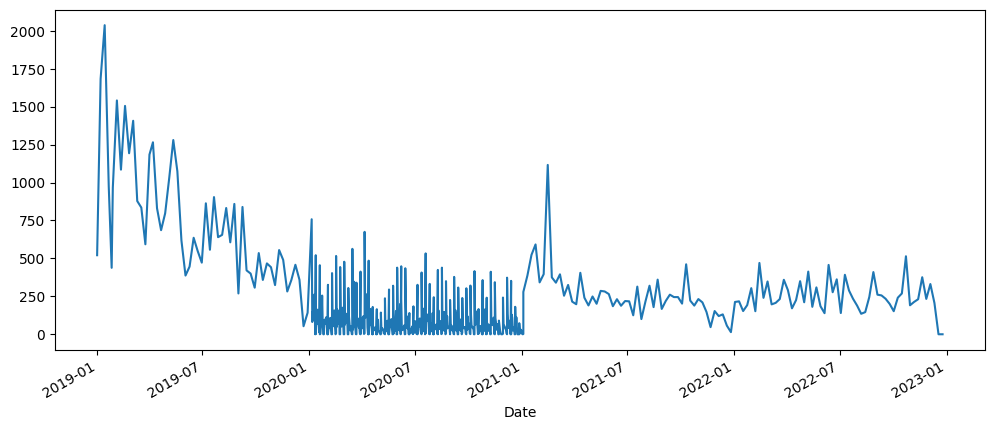

In [5]:
import matplotlib.pyplot as plt
Servers = df['Servers']
Servers.plot(figsize=(12,5))

In [6]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

In [7]:
ad_test(df['Servers'])

1. ADF :  -5.98623383139282
2. P-Value :  1.7894609078165675e-07
3. Num Of Lags :  14
4. Num Of Observations Used For ADF Regression: 558
5. Critical Values :
	 1% :  -3.4421235439968862
	 5% :  -2.866733577794069
	 10% :  -2.569536010842615


In [8]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [9]:
stepwise_fit = auto_arima(df['Servers'], trace=True,
suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7114.011, Time=1.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7340.495, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7272.080, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7128.626, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7338.517, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7121.915, Time=0.96 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7114.681, Time=0.65 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.52 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=7122.742, Time=1.72 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7124.536, Time=0.50 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.17 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=7113.058, Time=1.89 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=7155.295, Time=0.88 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=7115.042, Time=2.34 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  573
Model:               SARIMAX(3, 1, 1)   Log Likelihood               -3550.529
Date:                Tue, 13 Feb 2024   AIC                           7113.058
Time:                        19:43:51   BIC                           7139.153
Sample:                             0   HQIC                          7123.238
                                - 573                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.7623      1.632     -1.692      0.091      -5.962       0.437
ar.L1          0.0257      0.039      0.658      0.511      -0.051       0.102
ar.L2         -0.2094      0.025     -8.306      0.000      -0.259      -0.160
ar.L3         -0.1114      0.032     -3.432      0.001      -0.175      -0.048
ma.L1         -0.7213      0.033    -21.820      0.000      -0.786      -0.657
sigma2      1.438e+04    338.555     42.462      0.000    1.37e+04     1.5e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.54   Jarque-Bera (JB):              3785.71
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               0.05   Skew:                             1.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
from statsmodels.tsa.arima.model import ARIMA

In [11]:
print(df.shape)
train = df.iloc[:-30]
test = df.iloc[-30:]
print(train.shape,test.shape)

(573, 1)
(543, 1) (30, 1)


In [12]:
model=ARIMA(train['Servers'],order=(3,1,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Servers   No. Observations:                  543
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -3379.169
Date:                Tue, 13 Feb 2024   AIC                           6768.337
Time:                        19:44:00   BIC                           6789.813
Sample:                             0   HQIC                          6776.735
                                - 543                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0124      0.042      0.296      0.767      -0.070       0.095
ar.L2         -0.2148      0.027     -8.104      0.000      -0.267      -0.163
ar.L3         -0.1196      0.034     -3.538      0.000      -0.186      -0.053
ma.L1         -0.7002      0.036    -19.412      0.000      -0.771      -0.630
sigma2      1.518e+04    377.833     40.190      0.000    1.44e+04    1.59e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.15   Jarque-Bera (JB):              3360.61
Prob(Q):                              0.28   Prob(JB):                         0.00
Heteroskedasticity (H):               0.06   Skew:                             1.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
pred.index=df.index[start:end+1]
print(pred)

Date
2020-12-05    33.868264
2020-12-06    36.520590
2020-12-07    36.750303
2020-12-08    35.959924
2020-12-09    35.583492
2020-12-10    35.721121
2020-12-11    35.898238
2020-12-12    35.915902
2020-12-13    35.861611
2020-12-14    35.835956
2020-12-15    35.845186
2020-12-16    35.857306
2020-12-17    35.858543
2020-12-18    35.854851
2020-12-19    35.853089
2020-12-20    35.853713
2020-12-21    35.854540
2020-12-22    35.854627
2020-12-23    35.854376
2020-12-24    35.854255
2020-12-25    35.854297
2020-12-26    35.854354
2020-12-27    35.854360
2020-12-28    35.854343
2020-12-29    35.854335
2020-12-30    35.854337
2020-12-31    35.854341
2021-01-01    35.854342
2021-01-02    35.854341
2021-01-03    35.854340
Name: predicted_mean, dtype: float64


<Axes: xlabel='Date'>

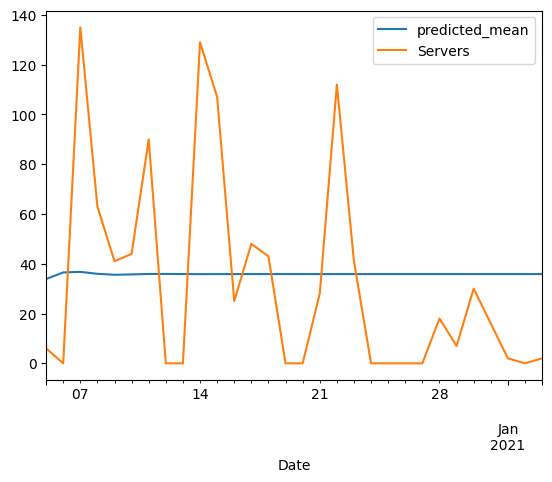

In [14]:
pred.plot(legend=True)
test['Servers'].plot(legend=True)